In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import sys
import shutil
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from os import path
from PIL import Image
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subah\anaconda3\envs\py36\lib\site-packag

In [2]:
PATH = './ChaseDB/training'

In [3]:
images=glob.glob(os.path.join(PATH,'images','*.jpg'))
mask=glob.glob(os.path.join(PATH,'1st_manual','*.png'))
if not os.path.exists('./ChaseDB/training/output_images'):
    os.makedirs('./ChaseDB/training/output_images')
if not os.path.exists('./ChaseDB/training/output_1st_manual'):
    os.makedirs('./ChaseDB/training/output_1st_manual')
src = "./ChaseDB/training/images/"
dst = "./ChaseDB/training/output_images/"
src1= "./ChaseDB/training/1st_manual/"
dst1 = "./ChaseDB/training/output_1st_manual/"

In [4]:
cropheight=350
cropwidth = 350
k=-1
for file in images:
    k+=1
    im = Image.open(images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

./ChaseDB/training\images\Image_01L.jpg (0, 0, 350, 350)
./ChaseDB/training\images\Image_01L.jpg (0, 350, 350, 700)
./ChaseDB/training\images\Image_01L.jpg (0, 700, 350, 1050)
./ChaseDB/training\images\Image_01L.jpg (350, 0, 700, 350)
./ChaseDB/training\images\Image_01L.jpg (350, 350, 700, 700)
./ChaseDB/training\images\Image_01L.jpg (350, 700, 700, 1050)
./ChaseDB/training\images\Image_01L.jpg (700, 0, 1050, 350)
./ChaseDB/training\images\Image_01L.jpg (700, 350, 1050, 700)
./ChaseDB/training\images\Image_01L.jpg (700, 700, 1050, 1050)
./ChaseDB/training\images\Image_01R.jpg (0, 0, 350, 350)
./ChaseDB/training\images\Image_01R.jpg (0, 350, 350, 700)
./ChaseDB/training\images\Image_01R.jpg (0, 700, 350, 1050)
./ChaseDB/training\images\Image_01R.jpg (350, 0, 700, 350)
./ChaseDB/training\images\Image_01R.jpg (350, 350, 700, 700)
./ChaseDB/training\images\Image_01R.jpg (350, 700, 700, 1050)
./ChaseDB/training\images\Image_01R.jpg (700, 0, 1050, 350)
./ChaseDB/training\images\Image_01R.jpg

./ChaseDB/training\images\Image_10L.jpg (0, 700, 350, 1050)
./ChaseDB/training\images\Image_10L.jpg (350, 0, 700, 350)
./ChaseDB/training\images\Image_10L.jpg (350, 350, 700, 700)
./ChaseDB/training\images\Image_10L.jpg (350, 700, 700, 1050)
./ChaseDB/training\images\Image_10L.jpg (700, 0, 1050, 350)
./ChaseDB/training\images\Image_10L.jpg (700, 350, 1050, 700)
./ChaseDB/training\images\Image_10L.jpg (700, 700, 1050, 1050)
./ChaseDB/training\images\Image_10R.jpg (0, 0, 350, 350)
./ChaseDB/training\images\Image_10R.jpg (0, 350, 350, 700)
./ChaseDB/training\images\Image_10R.jpg (0, 700, 350, 1050)
./ChaseDB/training\images\Image_10R.jpg (350, 0, 700, 350)
./ChaseDB/training\images\Image_10R.jpg (350, 350, 700, 700)
./ChaseDB/training\images\Image_10R.jpg (350, 700, 700, 1050)
./ChaseDB/training\images\Image_10R.jpg (700, 0, 1050, 350)
./ChaseDB/training\images\Image_10R.jpg (700, 350, 1050, 700)
./ChaseDB/training\images\Image_10R.jpg (700, 700, 1050, 1050)
./ChaseDB/training\images\Imag

In [5]:
cropheight=350
cropwidth = 350
k=-1
for file in mask:
    k+=1
    im = Image.open(mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.jpg' % (mask[k], i, j))
       files = [i for i in os.listdir(src1) if i.endswith(".jpg") and path.isfile(path.join(src1, i))]
       for f in files:
        shutil.move(path.join(src1, f), dst1)

./ChaseDB/training\1st_manual\Image_01L_1stHO.png (0, 0, 350, 350)
./ChaseDB/training\1st_manual\Image_01L_1stHO.png (0, 350, 350, 700)
./ChaseDB/training\1st_manual\Image_01L_1stHO.png (0, 700, 350, 1050)
./ChaseDB/training\1st_manual\Image_01L_1stHO.png (350, 0, 700, 350)
./ChaseDB/training\1st_manual\Image_01L_1stHO.png (350, 350, 700, 700)
./ChaseDB/training\1st_manual\Image_01L_1stHO.png (350, 700, 700, 1050)
./ChaseDB/training\1st_manual\Image_01L_1stHO.png (700, 0, 1050, 350)
./ChaseDB/training\1st_manual\Image_01L_1stHO.png (700, 350, 1050, 700)
./ChaseDB/training\1st_manual\Image_01L_1stHO.png (700, 700, 1050, 1050)
./ChaseDB/training\1st_manual\Image_01R_1stHO.png (0, 0, 350, 350)
./ChaseDB/training\1st_manual\Image_01R_1stHO.png (0, 350, 350, 700)
./ChaseDB/training\1st_manual\Image_01R_1stHO.png (0, 700, 350, 1050)
./ChaseDB/training\1st_manual\Image_01R_1stHO.png (350, 0, 700, 350)
./ChaseDB/training\1st_manual\Image_01R_1stHO.png (350, 350, 700, 700)
./ChaseDB/training\1s

./ChaseDB/training\1st_manual\Image_08L_1stHO.png (0, 350, 350, 700)
./ChaseDB/training\1st_manual\Image_08L_1stHO.png (0, 700, 350, 1050)
./ChaseDB/training\1st_manual\Image_08L_1stHO.png (350, 0, 700, 350)
./ChaseDB/training\1st_manual\Image_08L_1stHO.png (350, 350, 700, 700)
./ChaseDB/training\1st_manual\Image_08L_1stHO.png (350, 700, 700, 1050)
./ChaseDB/training\1st_manual\Image_08L_1stHO.png (700, 0, 1050, 350)
./ChaseDB/training\1st_manual\Image_08L_1stHO.png (700, 350, 1050, 700)
./ChaseDB/training\1st_manual\Image_08L_1stHO.png (700, 700, 1050, 1050)
./ChaseDB/training\1st_manual\Image_08R_1stHO.png (0, 0, 350, 350)
./ChaseDB/training\1st_manual\Image_08R_1stHO.png (0, 350, 350, 700)
./ChaseDB/training\1st_manual\Image_08R_1stHO.png (0, 700, 350, 1050)
./ChaseDB/training\1st_manual\Image_08R_1stHO.png (350, 0, 700, 350)
./ChaseDB/training\1st_manual\Image_08R_1stHO.png (350, 350, 700, 700)
./ChaseDB/training\1st_manual\Image_08R_1stHO.png (350, 700, 700, 1050)
./ChaseDB/traini

In [6]:
PATH1 = 'ChaseDB//training'

In [7]:
images=glob.glob(os.path.join(PATH1,'output_images','*.tiff'))
mask=glob.glob(os.path.join(PATH1,'output_1st_manual','*.jpg'))

In [8]:
def get_data(path, resize_dim=128):
    img=cv2.imread(path,0)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [9]:
def get_data_gif(path, resize_dim=128):
    img=plt.imread(path)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [10]:
orig_images=np.array([get_data(path) for path in images])
orig_images.shape

(234, 128, 128)

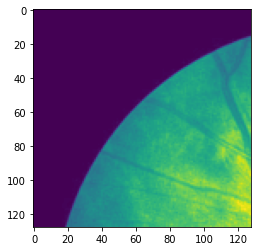

In [11]:
plt.imshow(orig_images[0])

In [12]:
masks=np.array([get_data_gif(path) for path in mask])
masks.shape

(234, 128, 128)

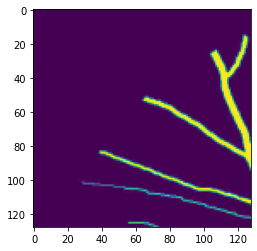

In [13]:
plt.imshow(masks[0])

In [14]:
orig_images = np.expand_dims(orig_images, axis = -1)
masks = np.expand_dims(masks, axis = -1)

In [15]:
masks.shape, orig_images.shape

((234, 128, 128, 1), (234, 128, 128, 1))

In [16]:
orig_images = orig_images / 255
masks = masks / 255

In [17]:
def get_unet():
    inputs = Input((128, 128, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [18]:
model = get_unet()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 32)   0           conv2d_2[0][0]                  

In [19]:
model.fit(orig_images, masks, epochs = 50, batch_size= 16, shuffle = True, validation_split = 0.1)

Train on 210 samples, validate on 24 samples
Epoch 1/50
210/210 [==============================] - 31s 149ms/step - loss: 0.6841 - accuracy: 0.8277 - val_loss: 0.6728 - val_accuracy: 0.8346
Epoch 2/50
210/210 [==============================] - 30s 145ms/step - loss: 0.6265 - accuracy: 0.8349 - val_loss: 0.4356 - val_accuracy: 0.8346
Epoch 3/50
210/210 [==============================] - 31s 150ms/step - loss: 0.4099 - accuracy: 0.8349 - val_loss: 0.3740 - val_accuracy: 0.8346
Epoch 4/50
210/210 [==============================] - 32s 154ms/step - loss: 0.3256 - accuracy: 0.8349 - val_loss: 0.2937 - val_accuracy: 0.8346
Epoch 5/50
210/210 [==============================] - 33s 159ms/step - loss: 0.2490 - accuracy: 0.8349 - val_loss: 0.2170 - val_accuracy: 0.8346
Epoch 6/50
210/210 [==============================] - 33s 156ms/step - loss: 0.2163 - accuracy: 0.8349 - val_loss: 0.2101 - val_accuracy: 0.8346
Epoch 7/50
210/210 [==============================] - 33s 157ms/step - loss: 0.2113 -

In [20]:
PATH2 = 'ChaseDB//test'

In [21]:
t_images=glob.glob(os.path.join(PATH2,'images','*.jpg'))

In [22]:
if not os.path.exists('./ChaseDB/test/output_images'):
    os.makedirs('./ChaseDB/test/output_images')
src = "./ChaseDB/test/images/"
dst = "./ChaseDB/test/output_images/"

In [23]:
cropheight=350
cropwidth = 350
k=-1
for file in t_images:
    k+=1
    im = Image.open(t_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (t_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tiff' % (t_images[k], i, j))
       files = [i for i in os.listdir(src) if i.endswith(".tiff") and path.isfile(path.join(src, i))]
       for f in files:
        shutil.move(path.join(src, f), dst)

ChaseDB//test\images\Image_14L.jpg (0, 0, 350, 350)
ChaseDB//test\images\Image_14L.jpg (0, 350, 350, 700)
ChaseDB//test\images\Image_14L.jpg (0, 700, 350, 1050)
ChaseDB//test\images\Image_14L.jpg (350, 0, 700, 350)
ChaseDB//test\images\Image_14L.jpg (350, 350, 700, 700)
ChaseDB//test\images\Image_14L.jpg (350, 700, 700, 1050)
ChaseDB//test\images\Image_14L.jpg (700, 0, 1050, 350)
ChaseDB//test\images\Image_14L.jpg (700, 350, 1050, 700)
ChaseDB//test\images\Image_14L.jpg (700, 700, 1050, 1050)
ChaseDB//test\images\Image_14R.jpg (0, 0, 350, 350)
ChaseDB//test\images\Image_14R.jpg (0, 350, 350, 700)
ChaseDB//test\images\Image_14R.jpg (0, 700, 350, 1050)
ChaseDB//test\images\Image_14R.jpg (350, 0, 700, 350)
ChaseDB//test\images\Image_14R.jpg (350, 350, 700, 700)
ChaseDB//test\images\Image_14R.jpg (350, 700, 700, 1050)
ChaseDB//test\images\Image_14R.jpg (700, 0, 1050, 350)
ChaseDB//test\images\Image_14R.jpg (700, 350, 1050, 700)
ChaseDB//test\images\Image_14R.jpg (700, 700, 1050, 1050)


In [24]:
PATH3 = 'ChaseDB//test'

In [25]:
t_images=glob.glob(os.path.join(PATH3,'output_images','*.tiff'))

In [26]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(18, 128, 128)

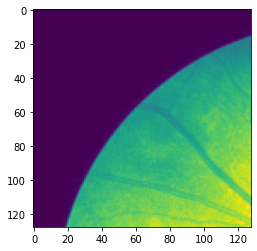

In [27]:
plt.imshow(test_images[0])

In [28]:
test_images = np.expand_dims(test_images, axis = -1)

In [29]:
test_images.shape

(18, 128, 128, 1)

In [30]:
test_images = test_images / 255

In [31]:
imgs_mask_test = model.predict(test_images, verbose=1)

18/18 [==============================] - 1s 41ms/step


In [32]:
#count=0
#idx=0
#DIR="C:\\Users\\subah\\retinaunetdrivecrop\\test\\predicted_masks"
#for i in os.listdir(DIR):
    #image=cv2.imread(os.path.join(DIR, i))
    #blurred_image = motion_blur(image)
    #cv2.imwrite('/path/to/destination/image'+str(count)+'.png',blurred_image) 
    #count+=1
    #i = imgs_mask_test[idx]
    #i = i[:, :, 0]
    #i.shape
    #plt.imshow(imgs_mask_test[idx], cmap='gray')
    #plt.imshow(i, cmap='gray')
    #Image.fromarray(np.uint8(cm.gist_earth(imgs_mask_test[idx])))
    #plt.imshow(imgs_mask_test[idx], cmap='gray')

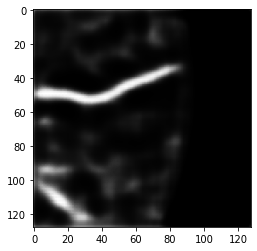

In [33]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

In [34]:
yp = np.round(imgs_mask_test,0)

In [35]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

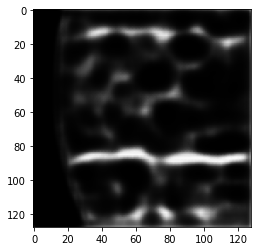

In [36]:
plt.imshow(i, cmap='gray')


In [47]:
PATH4 = 'Stare'

In [48]:
s_images=glob.glob(os.path.join(PATH4,'images','*.tiff'))
s_mask=glob.glob(os.path.join(PATH4,'1st_manual','*.GIF'))

In [49]:
if not os.path.exists('./Stare/output_images'):
    os.makedirs('./Stare/output_images')
src2 = "./Stare/images/"
dst2 = "./Stare/output_images/"
if not os.path.exists('./Stare/output_1st_manual'):
    os.makedirs('./Stare/output_1st_manual')
src3= "./Stare/1st_manual/"
dst3 = "./Stare/output_1st_manual/"

In [50]:
cropheight=350
cropwidth = 350
k=-1
for file in s_images:
    k+=1
    im = Image.open(s_images[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (s_images[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (s_images[k], i, j))
       files = [i for i in os.listdir(src2) if i.endswith(".tif") and path.isfile(path.join(src2, i))]
       for f in files:
        shutil.move(path.join(src2, f), dst2)

Stare\images\41_training.tiff (0, 0, 350, 350)
Stare\images\41_training.tiff (0, 350, 350, 700)
Stare\images\41_training.tiff (350, 0, 700, 350)
Stare\images\41_training.tiff (350, 350, 700, 700)
Stare\images\42_training.tiff (0, 0, 350, 350)
Stare\images\42_training.tiff (0, 350, 350, 700)
Stare\images\42_training.tiff (350, 0, 700, 350)
Stare\images\42_training.tiff (350, 350, 700, 700)
Stare\images\43_training.tiff (0, 0, 350, 350)
Stare\images\43_training.tiff (0, 350, 350, 700)
Stare\images\43_training.tiff (350, 0, 700, 350)
Stare\images\43_training.tiff (350, 350, 700, 700)
Stare\images\44_training.tiff (0, 0, 350, 350)
Stare\images\44_training.tiff (0, 350, 350, 700)
Stare\images\44_training.tiff (350, 0, 700, 350)
Stare\images\44_training.tiff (350, 350, 700, 700)
Stare\images\45_training.tiff (0, 0, 350, 350)
Stare\images\45_training.tiff (0, 350, 350, 700)
Stare\images\45_training.tiff (350, 0, 700, 350)
Stare\images\45_training.tiff (350, 350, 700, 700)
Stare\images\46_trai

In [51]:
cropheight=350
cropwidth = 350
k=-1
for file in s_mask:
    k+=1
    im = Image.open(s_mask[k])
    width, height = im.size
    for i in range(0, width, cropwidth):
     for j in range(0, height, cropheight): 
       box = (i, j,i+cropwidth, j+cropheight)
       print('%s %s' % (s_mask[k], box))
       im.crop(box).save('%s.width%03d.height%03d.tif' % (s_mask[k], i, j))
       files = [i for i in os.listdir(src3) if i.endswith(".tif") and path.isfile(path.join(src3, i))]
       for f in files:
        shutil.move(path.join(src3, f), dst3)

Stare\1st_manual\41_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\41_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\41_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\41_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\42_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\42_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\42_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\42_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\43_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\43_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\43_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\43_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\44_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\44_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\44_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\44_manual1.gif (350, 350, 700, 700)
Stare\1st_manual\45_manual1.gif (0, 0, 350, 350)
Stare\1st_manual\45_manual1.gif (0, 350, 350, 700)
Stare\1st_manual\45_manual1.gif (350, 0, 700, 350)
Stare\1st_manual\45_manual1.gif (

In [52]:
PATH5 = 'Stare'

In [53]:
t_images=glob.glob(os.path.join(PATH5,'output_images','*.tif'))

In [54]:
t_mask=glob.glob(os.path.join(PATH5,'output_1st_manual','*.tif'))

In [55]:
test_images=np.array([get_data(path) for path in t_images])
test_images.shape

(80, 128, 128)

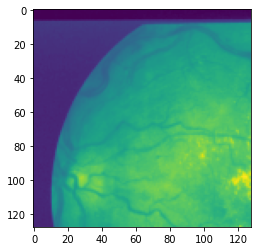

In [56]:
plt.imshow(test_images[0])

In [57]:
test_masks=np.array([get_data(path) for path in t_mask])
test_masks.shape

(80, 128, 128)

In [58]:
test_images = np.expand_dims(test_images, axis = -1)

In [59]:
test_masks = np.expand_dims(test_masks, axis = -1)

In [60]:
test_images.shape

(80, 128, 128, 1)

In [61]:
test_masks.shape

(80, 128, 128, 1)

In [62]:
test_images = test_images / 255

In [63]:
test_masks = test_masks / 255

In [64]:
imgs_mask_test = model.predict(test_images, verbose=1)

80/80 [==============================] - 3s 33ms/step


In [65]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

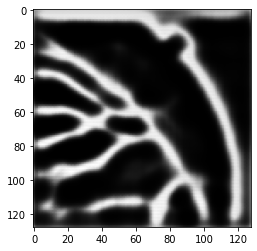

In [66]:
plt.imshow(i, cmap='gray')

In [67]:
yp = np.round(imgs_mask_test,0)

In [68]:
idx = random.randint(0, len(yp))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape

(128, 128)

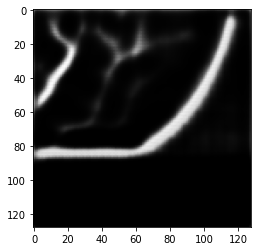

In [69]:
plt.imshow(i, cmap='gray')
plt.imsave('drive.png', i, cmap='gray')

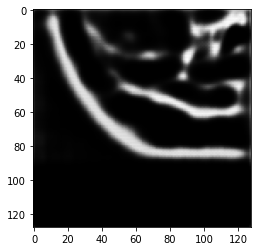

In [70]:
plt.imshow(imgs_mask_test[1], cmap='gray')

In [71]:
score= model.evaluate(test_masks,imgs_mask_test, verbose=1)

80/80 [==============================] - 3s 33ms/step


In [72]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.9814119338989258
Test accuracy: 0.00571517925709486


In [73]:
np.min(test_images)

0.0

In [74]:
np.max(test_images)

0.9686274509803922

In [75]:
np.min(test_masks)

0.0

In [76]:
np.max(test_masks)

1.0

In [77]:
np.min(imgs_mask_test)

0.0

In [78]:
np.max(imgs_mask_test)

0.70284885

In [79]:
imgs_mask_test = model.predict(test_images, verbose=1)

80/80 [==============================] - 3s 33ms/step


In [80]:
if not os.path.exists('./Stare/predict'):
    os.makedirs('./Stare/predict')
src4= "./Stare/1st_manual/"
dst4 = "./Stare/predict/"

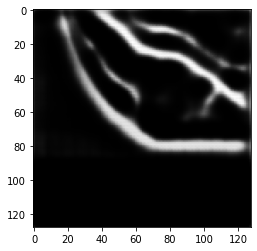

In [81]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')

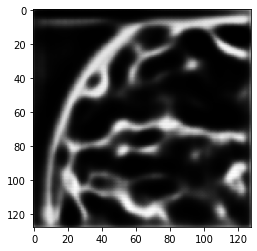

In [82]:
plt.imshow(imgs_mask_test[0], cmap='gray')

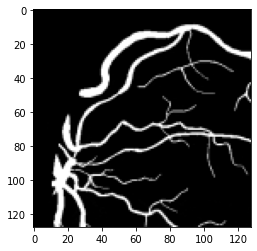

In [83]:
plt.imshow(test_masks[0], cmap='gray')

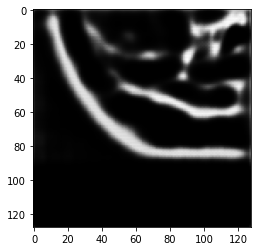

In [84]:
plt.imshow(imgs_mask_test[1], cmap='gray')

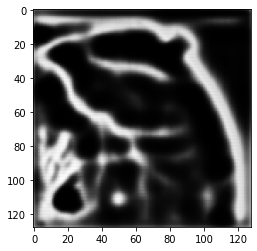

In [85]:
plt.imshow(imgs_mask_test[2], cmap='gray')

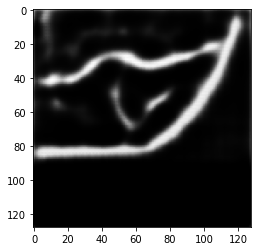

In [86]:
plt.imshow(imgs_mask_test[3], cmap='gray')

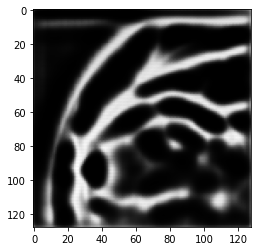

In [87]:
idx = random.randint(0, len(imgs_mask_test))
i = imgs_mask_test[idx]
i = i[:, :, 0]
i.shape
plt.imshow(i, cmap='gray')
plt.imsave('filename.png', i, cmap='gray')